In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df.head()

,Unnamed: 0,name,n_theater,n_seats,theater_name,n_seats2,attr,open,city,gu,...,lat,korea_opera,dance,musical,compound,play,opera,classic,total,total_reserved
0,0,(재)경기문화재단,1,154,다산홀,154,공공(기타),2001,경기,팔달구,...,37.265775,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
1,1,1M SPACE,1,0,1M SPACE,0,민간(대학로 외),2019,서울,서대문구,...,37.557601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1m클래식아트홀,1,130,1m클래식아트홀,130,민간(대학로),2007,서울,종로구,...,37.582749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2001 아울렛키즈홀 [구로],1,100,2001 아울렛키즈홀 [구로],100,민간(대학로 외),2017,서울,구로구,...,37.498073,0.0,0.0,16.0,2.0,1.0,0.0,1.0,20.0,5186.0
4,4,2001 아울렛키즈홀 [수원남문],1,100,2001 아울렛키즈홀 [수원남문],100,민간(대학로 외),2005,경기,팔달구,...,37.274439,0.0,0.0,22.0,1.0,1.0,0.0,0.0,24.0,2326.0


In [48]:
df = pd.read_csv('theater_dataset.csv', encoding='utf-8')
df.pivot_table(index='city', values='n_seats', aggfunc='sum').T

city,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
n_seats,95025,1032833,100166,73607,74830,78981,35837,115734,1825588,4948,20403,32826,45676,116501,17056,50971,28855


In [68]:
df1 = df.copy()
for i in range(len(df1)):
    df1.n_seats2[i] = df1.n_seats2[i].replace(',','')
    df1.n_seats2[i] = int(df1.n_seats2[i])


C:\Users\Junmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Junmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
df1.n_seats2[0]

154

In [72]:
df1.pivot_table(index='city', values='n_seats2', aggfunc='sum').T

city,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
n_seats2,60671,271105,40517,38566,17281,37242,19752,52572,382960,3974,10565,16828,26496,34798,12444,27310,20399


In [86]:
a = df1.pivot_table(index='city', values='n_seats2', aggfunc='sum')
a.sort_values(by='n_seats2', ascending=False).T

city,서울,경기,강원,부산,경남,경북,대구,전북,충남,전남,충북,대전,광주,인천,제주,울산,세종
n_seats2,382960,271105,60671,52572,40517,38566,37242,34798,27310,26496,20399,19752,17281,16828,12444,10565,3974


In [87]:
a_3 = a.sort_values(by='n_seats2', ascending=False)

In [92]:
sum(a_3.n_seats2.to_list()[2:])

419415

In [96]:
sum(a_3.n_seats2[0:2])

654065

In [94]:
(a_3.n_seats2[0] + a_3.n_seats2[1])

654065

In [98]:
(a_3.n_seats2[0] + a_3.n_seats2[1]) / sum(a_3.n_seats2[:])*100

60.92940716175429

In [82]:
a = a.sort_values(by='city', ascending=False)
a.T

,n_seats2
city,
충북,20399
충남,27310
제주,12444
전북,34798
전남,26496
인천,16828
울산,10565
세종,3974
서울,382960


In [74]:
a.columns = ['gangwon', 'gyungki','kyungnam','kyungbuk', 'gwangju','daegu','daejeon','busan','seoul','sejong','ulsan','incheon','jeonnam','jeonbuk','jeju','chungnam','chungbuk']

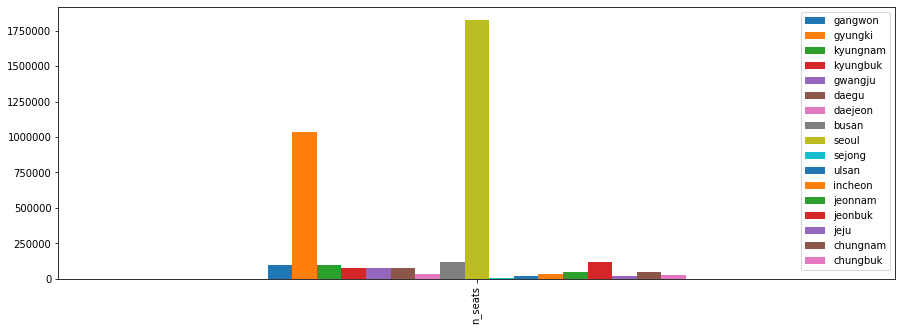

In [14]:
a.plot(kind='bar', figsize=(15,5))


In [76]:
a_1 = a.T
a_2 = a_1.sort_values(by='n_seats2', ascending=False)
a_2

,n_seats2
seoul,382960
gyungki,271105
gangwon,60671
busan,52572
kyungnam,40517
kyungbuk,38566
daegu,37242
jeonbuk,34798
chungnam,27310
jeonnam,26496


In [77]:
a_2.T

,seoul,gyungki,gangwon,busan,kyungnam,kyungbuk,daegu,jeonbuk,chungnam,jeonnam,chungbuk,daejeon,gwangju,incheon,jeju,ulsan,sejong
n_seats2,382960,271105,60671,52572,40517,38566,37242,34798,27310,26496,20399,19752,17281,16828,12444,10565,3974


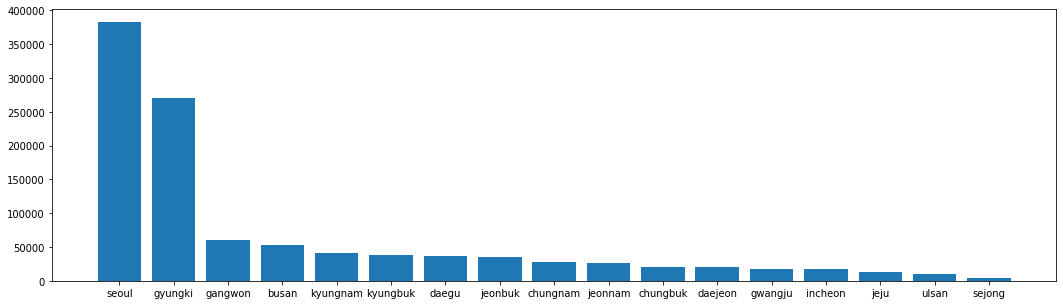

In [78]:
plt.figure(figsize = (18,5))
plt.bar(x = a_2.index, height = a_2.n_seats2)
plt.show()

In [28]:
b = pd.DataFrame(df.city.value_counts()).T
b.columns = ['seoul','gyunki','busan','daegu','gyungnam','gangwon','jeonbuk','gyungbuk','chungnam','jeonnam','daejeon','gwangju','incheon','chungbuk','jeju','ulsan','sejong']
b

,seoul,gyunki,busan,daegu,gyungnam,gangwon,jeonbuk,gyungbuk,chungnam,jeonnam,daejeon,gwangju,incheon,chungbuk,jeju,ulsan,sejong
city,725,235,107,92,89,75,70,70,65,57,55,50,49,40,30,29,10


In [29]:
b_1 = b.T
b_1

,city
seoul,725
gyunki,235
busan,107
daegu,92
gyungnam,89
gangwon,75
jeonbuk,70
gyungbuk,70
chungnam,65
jeonnam,57


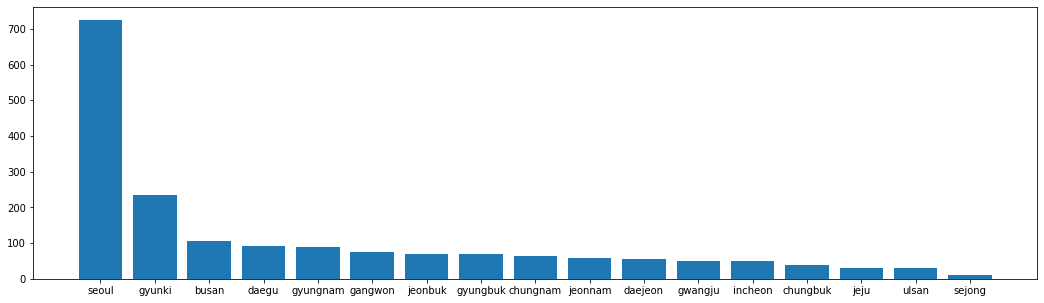

In [43]:
plt.figure(figsize = (18,5))
plt.bar(x = b_1.index, height = b_1.city)
plt.show()

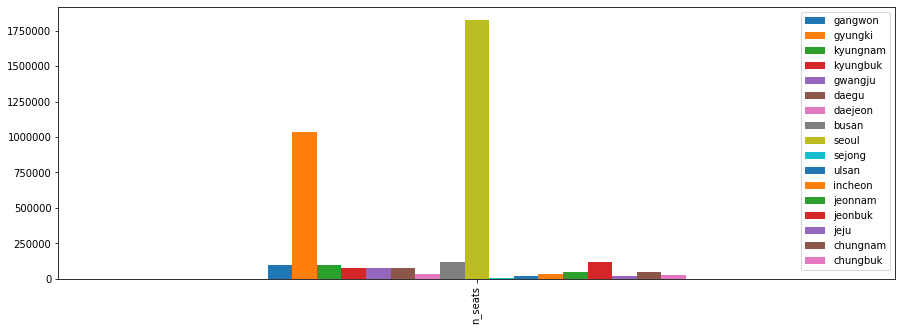

In [19]:
a.plot(kind='bar', figsize=(15,5))

In [3]:
df = pd.read_csv('theater_final.csv', encoding='euc-kr')

In [5]:
df.pivot_table(index='city', values='n_seats', aggfunc='sum').T

city,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
n_seats,95025,1032427,100166,73607,74830,78981,35837,115734,1823744,4948,20403,32826,45676,116501,17056,50971,28855


In [7]:
import numpy as np
np.sum(df.pivot_table(index='city', values='n_seats', aggfunc='sum'))

n_seats    3747587
dtype: int64

In [8]:
(1032427+1823744)/3747587*100

76.21360091173334

In [67]:
df_final = pd.read_csv('theater_final.csv', encoding='euc-kr')
df_final.head()

,name,n_theater,n_seats,theater_name,n_seats2,attr,open,city,gu,address,pyuneui,jangaein,jucha
0,(재)경기문화재단,1,154,다산홀,154,공공(기타),2001,경기,수원시,경기도 수원시 팔달구 인계로 178 (인계동),1.0,1.0,1.0
1,1M SPACE,1,0,1M SPACE,0,민간(대학로 외),2019,서울,서대문구,서울특별시 서대문구 연세로4길 27 (창천동),0.0,0.0,0.0
2,1m클래식아트홀,1,130,1m클래식아트홀,130,민간(대학로),2007,서울,종로구,서울특별시 종로구 대학로12길 31 (동숭동),0.0,1.0,0.0
3,2001 아울렛키즈홀 [구로],1,100,2001 아울렛키즈홀 [구로],100,민간(대학로 외),2017,서울,구로구,서울특별시 구로구 중앙로1길 36 (고척동),1.0,1.0,1.0
4,2001 아울렛키즈홀 [수원남문],1,100,2001 아울렛키즈홀 [수원남문],100,민간(대학로 외),2005,경기,수원시,경기도 수원시 팔달구 중부대로34번길 15 (인계동),1.0,1.0,1.0


In [68]:
df_final.tail()

,name,n_theater,n_seats,theater_name,n_seats2,attr,open,city,gu,address,pyuneui,jangaein,jucha
1841,후용공연예술센터,2,320,교실극장,120,민간(대학로 외),2001,강원,원주시,강원도 원주시 문막읍 비야동길 11,0.0,0.0,1.0
1842,후용공연예술센터,2,320,야외공연장,200,민간(대학로 외),2001,강원,원주시,강원도 원주시 문막읍 비야동길 11,0.0,0.0,1.0
1843,흰물결아트센터,3,978,화이트홀,475,민간(대학로 외),2007,서울,서초구,서울특별시 서초구 반포대로 150 (서초동),0.0,0.0,0.0
1844,흰물결아트센터,3,978,아트홀,200,민간(대학로 외),2007,서울,서초구,서울특별시 서초구 반포대로 150 (서초동),0.0,0.0,0.0
1845,흰물결아트센터,3,978,예술극장,303,민간(대학로 외),2007,서울,서초구,서울특별시 서초구 반포대로 150 (서초동),0.0,0.0,0.0


In [103]:
df_final.describe()[['n_seats','n_seats2','open']]

,n_seats,n_seats2,open
count,1846.000000,1846.000000,1846.000000
mean,2030.112134,581.122969,1777.940412
std,11466.726770,3337.307978,634.008376
min,0.000000,0.000000,0.000000
25%,120.750000,100.000000,1993.000000
50%,400.000000,201.500000,2005.000000
75%,1029.000000,480.000000,2012.000000
max,161495.000000,100000.000000,2020.000000


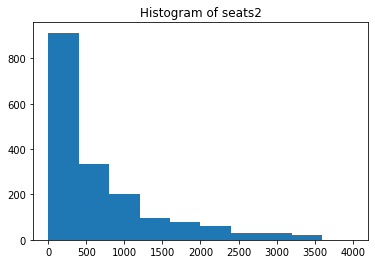

In [81]:
plt.hist(df_final.n_seats,range=(df_final.n_seats.min(),4000))
plt.title('Histogram of seats2')
plt.show()

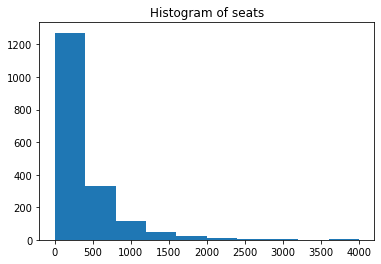

In [76]:
plt.hist(df_final.n_seats2,range=(df_final.n_seats2.min(),4000))
plt.title('Histogram of seats')
plt.show()

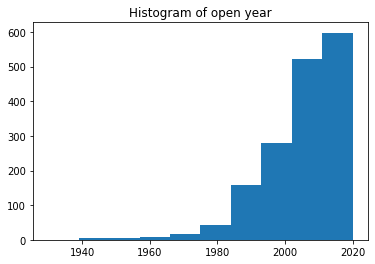

In [80]:
plt.hist(df_final.open,range=(1930,2020))
plt.title('Histogram of open year')
plt.show()

In [108]:
pd.DataFrame(df_final.city.value_counts()).T

,서울,경기,부산,대구,경남,강원,전북,경북,충남,전남,대전,광주,인천,충북,제주,울산,세종
city,724,234,107,92,89,75,70,70,65,57,55,50,49,40,30,29,10


In [94]:
df_final.pivot_table(index='city',values=['n_seats','n_seats2'])

,n_seats,n_seats2
city,,
강원,1267.000000,808.946667
경기,4412.081197,1158.141026
경남,1125.460674,455.247191
경북,1051.528571,550.942857
광주,1496.600000,345.620000
대구,858.489130,404.804348
대전,651.581818,359.127273
부산,1081.626168,491.327103
서울,2518.983425,528.084254


In [95]:
df_final.columns

Index(['name', 'n_theater', 'n_seats', 'theater_name', 'n_seats2', 'attr',
       'open', 'city', 'gu', 'address', 'pyuneui', 'jangaein', 'jucha'],
      dtype='object')

In [101]:
juyosisul_count = df_final.pivot_table(index=['pyuneui', 'jangaein', 'jucha'],values='name',aggfunc='count')
juyosisul_count.columns=['count']
juyosisul_count

count
pyuneui jangaein jucha       
0.0     0.0      0.0      289
                 1.0      340
        1.0      0.0        9
                 1.0      348
1.0     0.0      0.0       67
                 1.0      199
        1.0      0.0        9
                 1.0      585